In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
df = pd.read_csv('/Users/brejesh/Downloads/walmart/Data/Walmart_Sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
df.shape

(6435, 8)

In [9]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [10]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [11]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day
df['Is_Weekend'] = df['Date'].dt.dayofweek >= 5  # Saturday/Sunday = True
df = df.drop(columns=['Date'])

In [13]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,Is_Weekend
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5,False
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,12,False
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19,False
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26,False
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,5,False


In [14]:
df.shape

(6435, 12)

In [15]:
correlation = df.corr()

<Axes: >

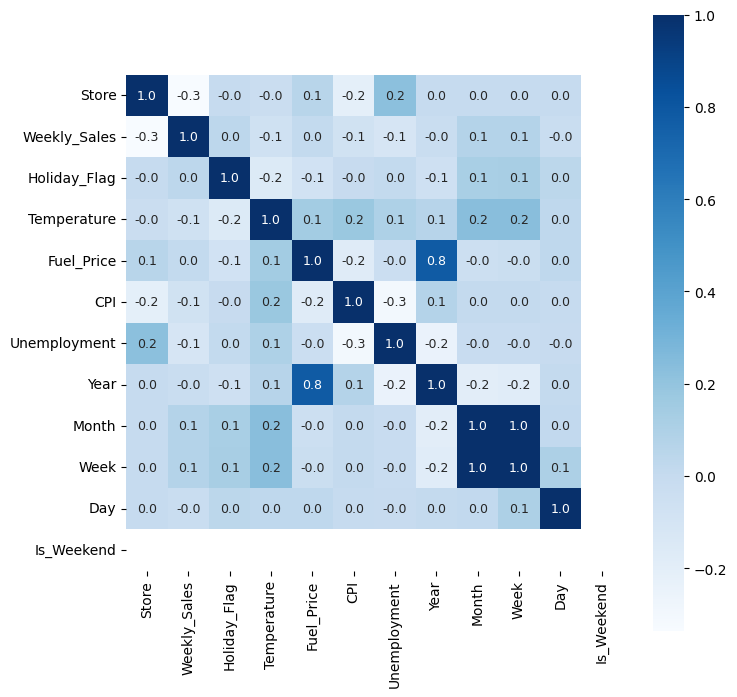

In [16]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':9}, cmap='Blues')

/var/folders/9w/29s0j1y53rb5mlsfpk28vmnr0000gn/T/ipykernel_84257/1926678207.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weekly_Sales'],color='green')


<Axes: xlabel='Weekly_Sales', ylabel='Density'>

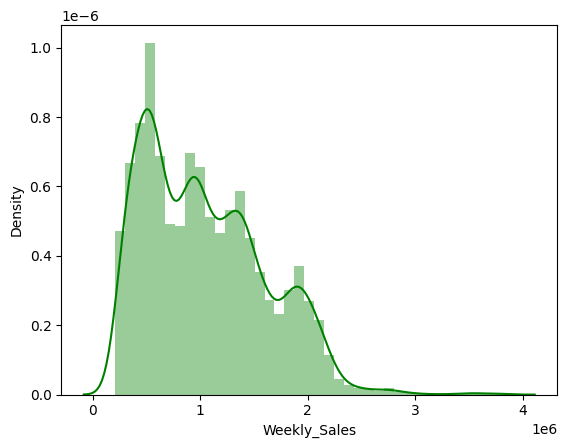

In [17]:
sns.distplot(df['Weekly_Sales'],color='green')

In [18]:
X = df.drop(columns=['Weekly_Sales'])
y = df['Weekly_Sales']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

In [30]:
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [31]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 46593.64753957848
MSE: 6234801920.415539
RMSE: 78960.76190371733
R² Score: 0.980646551050723


In [32]:
data1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data1.head()

,Actual,Predicted
2436,1138800.32,1.124456e+06
3361,1304850.67,1.410071e+06
233,1769296.25,1.814735e+06
3667,1077640.13,9.843002e+05
5011,428851.99,4.550742e+05


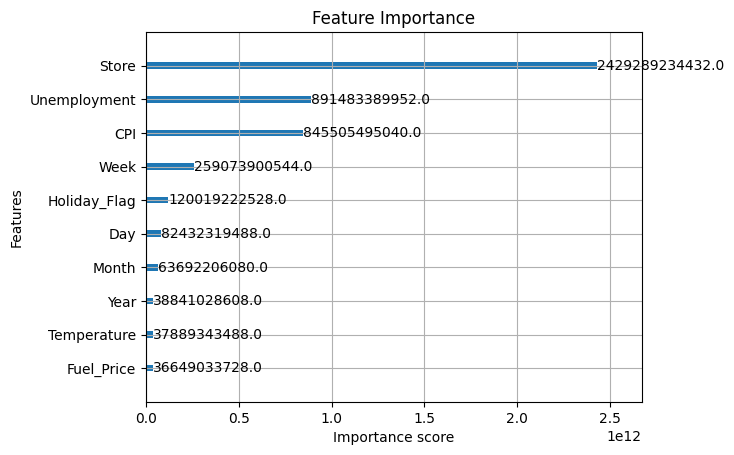

In [33]:
xgb.plot_importance(xgb_model, importance_type='gain')
plt.title('Feature Importance')
plt.show()


<Axes: >

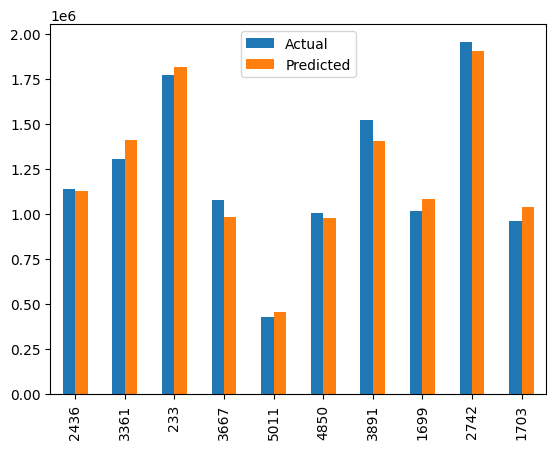

In [34]:
graph =data1.head(10)

graph.plot(kind='bar')

In [41]:
import joblib
joblib.dump(model, 'xgboost_model.pkl')  # Load later in VS Code or Streamlit

['xgboost_model.pkl']

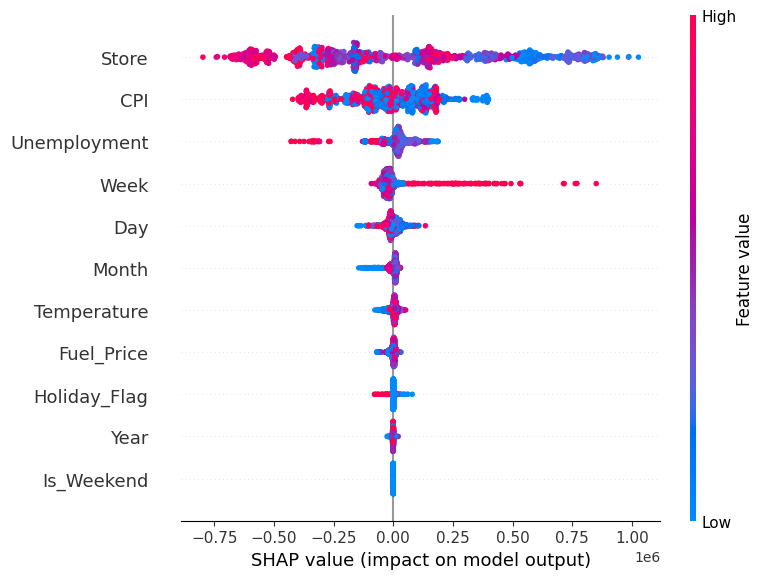

In [42]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Global explanation
shap.summary_plot(shap_values, X_test)


In [43]:
shap.initjs()

index = 0  # Change index to inspect other samples
shap.force_plot(
    base_value=shap_values[index].base_values,
    shap_values=shap_values[index].values,
    features=X_test.iloc[index],
    feature_names=X_test.columns
)


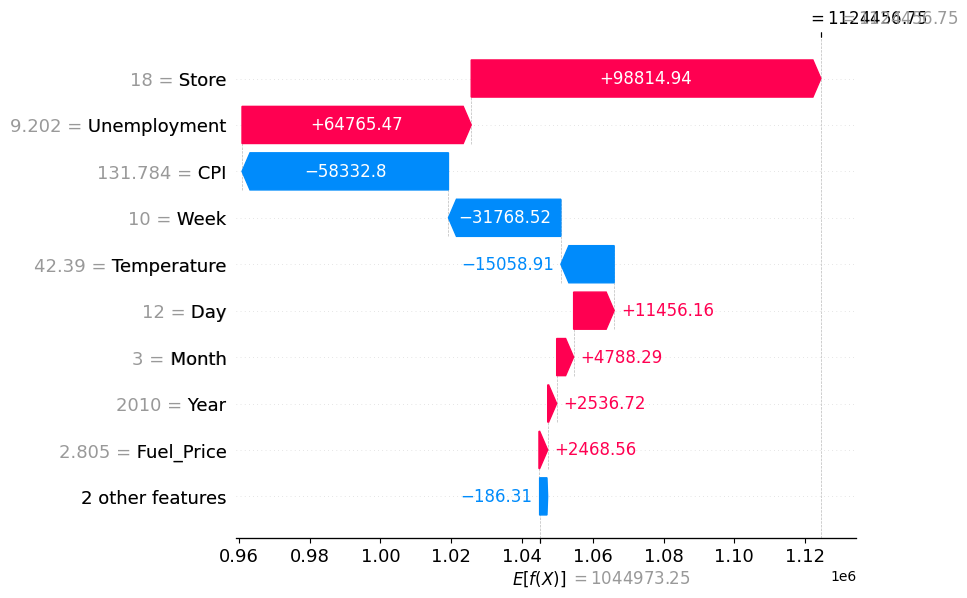

In [44]:
shap.plots.waterfall(shap_values[index])


In [45]:
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_df.to_csv("shap_explanations.csv", index=False)


In [48]:
pip install -U langchain langchain-groq langchain-experimental


  Using cached langchain_experimental-0.3.4-py3-none-any.whl.metadata (1.7 kB)
  Using cached langchain_community-0.3.27-py3-none-any.whl.metadata (2.9 kB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached pydantic_settings-2.10.1-py3-none-any.whl.metadata (3.4 kB)
  Using cached httpx_sse-0.4.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.4.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached marshmallow-3.26.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached typing_inspect-0.9.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached mypy_extensions-1.1.0-py3-none-any.whl.metadata (1.1 kB)
Using cached langchain_experimental-0.3.4-py3-none-any.whl (209 kB)
Using cached langchain_community-0.3.27-py3-none-any.whl (2.5 MB)
Using cached dataclasses_json-0.6.7-py3-none-any.whl (28 kB)
Using cached httpx_sse-0.4.1-py3-none-any.whl (8.1 kB)
Using cached marshmallow-3.26.

In [7]:
# 🧠 Import LLM & LangChain Core
from langchain_groq import ChatGroq
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain, ConversationChain
from langchain.memory import ConversationBufferMemory
from langchain_experimental.agents import create_pandas_dataframe_agent
import pandas as pd

# ✅ Initialize Groq LLM
llm = ChatGroq(
    model="llama3-70b-8192",
    api_key="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"
)

# ✅ Load SHAP Explanation or Sales Data
df = pd.read_csv("shap_explanations.csv")  # Or any relevant CSV

# ✅ 1. Prompt-Based Business Reasoning Chain
template = """
You are a smart retail analyst. Analyze the following query:
{question}

Give a clear, insightful business explanation.
"""
prompt = PromptTemplate.from_template(template)
business_chain = LLMChain(llm=llm, prompt=prompt)

# ✅ 2. DataFrame Agent (SHAP insights)
df_agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=False,
    allow_dangerous_code=True
)

# ✅ 3. Conversational Agent
memory = ConversationBufferMemory()
conversation = ConversationChain(llm=llm, memory=memory, verbose=False)

# ✅ 4. CPI Reasoning Chain (replacing error-prone Tool Agent)
cpi_prompt = PromptTemplate.from_template(
    "The user asked: {query}\nRespond with how the current CPI impacts sales performance."
)
cpi_chain = LLMChain(llm=llm, prompt=cpi_prompt)

# 🔁 Unified Query
user_query = input("Ask your RetailGPT query (e.g., 'Why were Store 5's sales low last Diwali?'):\n")

# ✅ Run all agents
print("\n🧠 Prompt-Based Business Reasoning:\n", business_chain.run({"question": user_query}))
print("\n📊 SHAP DataFrame Agent:\n", df_agent.run(user_query))
print("\n🔁 Conversational Agent:\n", conversation.predict(input=user_query))
print("\n📈 CPI Reasoning:\n", cpi_chain.run({"query": user_query}))



🧠 Prompt-Based Business Reasoning:
 After digging into the data and conducting a thorough analysis, I've identified several key factors that contributed to the low sales performance at Store 9 during the crucial Christmas period. Here's a breakdown of the key insights:

**1. Weaker Marketing Efforts:** A review of the marketing campaigns revealed that Store 9 received limited promotional support during the Christmas season. Compared to other stores, Store 9 had fewer social media posts, email campaigns, and in-store promotions, which likely reduced foot traffic and sales.

**2. Inventory Imbalance:** An analysis of inventory levels showed that Store 9 was overstocked on certain product categories, such as winter clothing, and understocked on more popular items, like toys and electronics. This imbalance led to missed sales opportunities and frustrated customers who couldn't find what they were looking for.

**3. Competition from New Entrant:** A competitor analysis revealed that a new 

In [8]:
# 🧠 Import LLM & LangChain Core
from langchain_groq import ChatGroq
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain, ConversationChain
from langchain.memory import ConversationBufferMemory
from langchain_experimental.agents import create_pandas_dataframe_agent
import pandas as pd

# ✅ Initialize Groq LLM
llm = ChatGroq(
    model="llama3-70b-8192",
    api_key="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" # Replace with your key
)

# ✅ Load SHAP Explanation or Sales Data
df = pd.read_csv("shap_explanations.csv")  # Or your CSV file

# ✅ Business Reasoning Chain
template = """
You are a smart retail analyst. Analyze the following query:
{question}

Give a clear, insightful business explanation.
"""
prompt = PromptTemplate.from_template(template)
business_chain = LLMChain(llm=llm, prompt=prompt)

# ✅ SHAP DataFrame Agent
df_agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=False,
    allow_dangerous_code=True
)

# ✅ Conversational Agent with Memory
memory = ConversationBufferMemory()
conversation = ConversationChain(llm=llm, memory=memory, verbose=False)

# ✅ CPI Chain
cpi_prompt = PromptTemplate.from_template(
    "The user asked: {query}\nRespond with how the current CPI impacts sales performance."
)
cpi_chain = LLMChain(llm=llm, prompt=cpi_prompt)

# 🔁 Continuous Query Loop
print("✅ RetailGPT Assistant Ready! Type 'exit' to stop.\n")

while True:
    user_query = input("🔎 Ask your RetailGPT question:\n")
    if user_query.lower() in ["exit", "quit"]:
        print("👋 Session ended.")
        break

    # Run all chains
    print("\n🧠 Business Reasoning:\n", business_chain.run({"question": user_query}))
    print("\n📊 SHAP Data Agent:\n", df_agent.run(user_query))
    print("\n🔁 Conversational Agent:\n", conversation.predict(input=user_query))
    print("\n📈 CPI Reasoning:\n", cpi_chain.run({"query": user_query}))
    print("—" * 60 + "\n")


✅ RetailGPT Assistant Ready! Type 'exit' to stop.


🧠 Business Reasoning:
 After analyzing the sales data and conducting a thorough review of Store 4's operations, I've identified several key factors that contributed to the low sales during the Christmas season:

1. **Inventory Misalignment**: Store 4 had an overstock of winter clothing and an understock of popular holiday gifts, such as toys and electronics. This mismatch resulted in a lack of appealing products for customers, leading to decreased sales.
2. **Poor In-Store Experience**: Store 4's visual merchandising and in-store displays were not festive or engaging, failing to create a holiday shopping atmosphere that would draw customers in and encourage them to make purchases.
3. **Insufficient Marketing Efforts**: Compared to other stores in the region, Store 4's marketing campaigns, including social media and email promotions, were lackluster and didn't effectively communicate the store's holiday offerings, resulting in low foot

In [ ]:
# app.py

import streamlit as st
import pandas as pd
from langchain_groq import ChatGroq
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain, ConversationChain
from langchain.memory import ConversationBufferMemory
from langchain.agents import Tool, initialize_agent
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents import create_pandas_dataframe_agent

# -------------------------------
# 🧠 Initialize LLM
# -------------------------------
llm = ChatGroq(
    model="llama3-70b-8192",
    api_key="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"  # Replace with your Groq key
)

# -------------------------------
# 📊 Load SHAP/Sales Dataset
# -------------------------------
df = pd.read_csv("shap_explanations.csv")  # or Walmart_Sales.csv

# -------------------------------
# 🔗 Chains Setup
# -------------------------------

# 1. Business Reasoning Prompt Chain
business_prompt = PromptTemplate.from_template("""
You are a smart retail analyst. Analyze the following query:
{question}

Give a clear, insightful business explanation.
""")
business_chain = LLMChain(llm=llm, prompt=business_prompt)

# 2. DataFrame Agent
df_agent = create_pandas_dataframe_agent(
    llm, df, verbose=False, allow_dangerous_code=True
)

# 3. Conversation Memory Agent
memory = ConversationBufferMemory()
conversation = ConversationChain(llm=llm, memory=memory, verbose=False)

# 4. CPI Reasoning Chain
cpi_prompt = PromptTemplate.from_template("""
Analyze the CPI impact on the following retail query:
{query}

Explain how CPI changes might influence consumer behavior or store sales.
""")
cpi_chain = LLMChain(llm=llm, prompt=cpi_prompt)

# 5. Tool-based CPI Agent (optional)
def tool_fn(input_text):
    return "Latest CPI is 4.5%. High CPI can reduce discretionary spending, impacting retail sales."

tool_agent = initialize_agent(
    tools=[Tool(name="Get CPI Info", func=tool_fn, description="Provides CPI info.")],
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=False
)

# -------------------------------
# 🚀 Streamlit UI
# -------------------------------
st.set_page_config(page_title="RetailGPT Dashboard", layout="wide")
st.title("🛍️ RetailGPT: Holiday-Aware Sales Intelligence Assistant")
st.markdown("Ask natural language questions about store performance, SHAP results, or CPI impact.")

query = st.text_input("💬 Ask your question (e.g. 'Why were Store 5's sales low on Christmas?')")

if query:
    with st.spinner("🤖 Analyzing..."):
        # Run all agents
        business_resp = business_chain.run(query)
        df_resp = df_agent.run(query)
        convo_resp = conversation.predict(input=query)
        cpi_resp = cpi_chain.run({"query": query})

    # Output
    st.subheader("🧠 Business Reasoning")
    st.markdown(business_resp)

    st.subheader("📊 SHAP Data Agent")
    st.markdown(df_resp)

    st.subheader("🔁 Conversational Memory")
    st.markdown(convo_resp)

    st.subheader("📈 CPI Reasoning")
    st.markdown(cpi_resp)

    st.success("✅ Analysis complete! Ask another query.")

# Optional: Show raw data
with st.expander("📂 View Underlying Data"):
    st.dataframe(df)


2025-07-13 20:42:45.049 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-13 20:42:45.049 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-13 20:42:45.082 
  command:

    streamlit run /Users/brejesh/anaconda3/envs/retailgpt-env/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-07-13 20:42:45.083 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-13 20:42:45.083 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-13 20:42:45.083 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-13 20:42:45.083 Thread 'MainThread': missing ScriptRunContext! This wa